# 4.10 Instacart Final Project Part 1

# Table of contents
#### Import Libraries
#### Import 'orders_products_customers_merged' dataset
#### Manage security implications
#### Create Region variable based on states
#### Determine difference in spending habits by region
#### Create bar chart visualizing spending difference by region

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Define path
path = r'C:\Users\cschm\Desktop\CareerFoundry\Instacart Basket Analysis'

In [4]:
#Import orders_products_customers data
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
#Check shape of dataset
ords_prods_cust.shape

(32404859, 33)

In [6]:
#Check variables and values of dataset
ords_prods_cust.head()

,user_id,First Name,Last Name,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,...,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spender_flag,order_frequency,order_freq_flag,avg_spend,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,both


#### Consider any security implications that may exist for this data.

In [7]:
#Drop First name and Last name columns since they identify users but are not needed for this analysis. Also drop _merge as it is not needed
ords_prods_cust = ords_prods_cust.drop(columns = ['First Name', 'Last Name', '_merge'])

In [8]:
#Check column names
ords_prods_cust.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'number_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'Busiest day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spender_flag', 'order_frequency', 'order_freq_flag', 'avg_spend'],
      dtype='object')

#### Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [9]:
#Creating Region variable based on states via in loop
result = []

for value in ords_prods_cust['STATE']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append('Northeast')
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append('Midwest')
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append('South')
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result.append('West')
  else:
    result.append('NaN')

In [10]:
ords_prods_cust['Region'] = result

In [11]:
#Check frequency of Regions variable
ords_prods_cust['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [12]:
#Sum of region totals should equal 32404859, which it does.
10791885 + 8292913 +7597325 + 5722736

32404859

#### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [13]:
#Grouping regions by spender flag
crosstab = pd.crosstab(ords_prods_cust['Region'], ords_prods_cust['spender_flag'], dropna = False)

In [14]:
print(crosstab)

spender_flag  High spender  Low spender
Region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


In [15]:
#Creating percentage for spender type for all regions
percentage_result = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

In [16]:
print(percentage_result)

spender_flag  High spender  Low spender
Region                                 
Midwest           2.053025    97.946975
Northeast         1.891141    98.108859
South             1.943043    98.056957
West              1.933627    98.066373


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

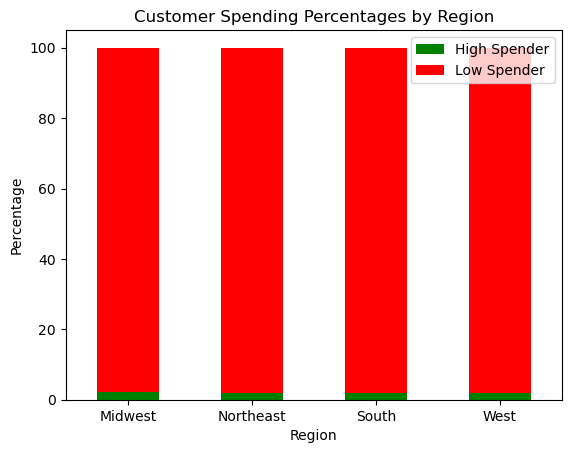

In [17]:
#Create stacked bar chart of spending percentages per region
percentage_result.plot.bar(stacked = True, color = ['g', 'r'])
plt.ylabel('Percentage')
plt.legend(['High Spender', 'Low Spender'])
plt.title('Customer Spending Percentages by Region')
plt.xticks(rotation = 0, ha = 'center')

In [18]:
#Export bar chart as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_percentage.png'))

NameError: name 'bar' is not defined

In [19]:
#Export df as pickle to continue in new notebook per memory issues
ords_prods_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))